In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the data from the Excel file
file_path = 'final1.xlsx'
df = pd.read_excel(file_path)
#df.head
# List the columns in the DataFrame
print(df.columns)


Index(['Name', 'BSE Code_x', 'NSE Code_x', 'Industry', 'Current Price', 'RSI',
       'Return over 1day', 'Return over 6months', 'Price to Earning', 'EPS',
       'PEG Ratio', 'Market Capitalization', 'Sales', 'OPM', 'NPM last year',
       'Book value', 'Price to book value', 'Debt to equity',
       'Return on capital employed', 'Return on equity',
       'Cash from investing last year', 'Capital work in progress',
       'YOY Quarterly sales growth', 'YOY Quarterly profit growth',
       'Sales growth', 'Sales growth 3Years', 'Profit growth 3Years',
       'Sales growth 5Years', 'Profit growth 5Years', 'Promoter holding',
       'Cash from operations last year', 'Cash from financing last year',
       'Net cash flow last year', 'Return on assets', 'Asset Turnover Ratio',
       'Price to EBITDA', 'High price', 'Low price', 'Down from 52w high',
       'Up from 52w low', 'QoQ Sales', 'QoQ Profits', 'Cash Turnover Ratio',
       'Cash Conversion Cycle', 'Dividend yield', 'EVEBITDA',
 

In [2]:
# Data Cleaning
# Drop any rows with missing values or NaNs
df.drop('NSE Code_x', axis=1, inplace=True)
df.drop('BSE Code_x', axis=1, inplace=True)

#df.drop('Industry', axis=1, inplace=True)

if df['Interest Coverage Ratio'].isnull().any():
    df['Interest Coverage Ratio']=0
if df['Price to book value'].isnull().any():
    df['Price to book value']=df['Current Price']/df['Book value']
if df['Change in promoter holding 3Years'].isnull().any():
    df['Change in promoter holding 3Years']=0
if df['Sales growth 5Years'].isnull().any():
    df['Sales growth 5Years']=0
if df['Profit growth 5Years'].isnull().any():
    df['Profit growth 5Years']=0
if df['Return over 5years'].isnull().any():
    df['Return over 5years']=0
#df.drop('NSE Code', axis=1, inplace=True)
#df.dropna(inplace=True)
df = pd.get_dummies(df, columns=['Industry'])
df = df.apply(pd.to_numeric, errors='ignore')
df['Past Price']=df['Current Price'] / (1 + df['Return over 1month'] / 100)
#df['Future Price']=df['Current Price'] * 1.10

MFFPC, MPFPC, MP = df['Future Price2']/df['Current Price'], df['Current Price']/df['Past Price'], df['Current Price']
df['Mean Future Fractional Price Change'] = MFFPC
df['Mean Past Fractional Price Change'] = MPFPC
df['Mean Price'] = MP

df.drop('Future Price', axis=1, inplace=True)
df.drop('Future Price2', axis=1, inplace=True)
print("Number of rows in the DataFrame:", df.shape[0])


Number of rows in the DataFrame: 4451


C:\Users\Logus\AppData\Local\Temp\ipykernel_13524\1437060131.py:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [3]:
# Assuming 'df' is your DataFrame
null_values_count = df.isnull().sum()

# Sort the result in descending order
null_values_count_sorted = null_values_count.sort_values(ascending=False)

# Print the number of null values in each column in descending order
print("Number of null values in each column (in descending order):")
print(null_values_count_sorted)

Number of null values in each column (in descending order):
PEG Ratio                                    1864
Price to Earning                             1133
YOY Quarterly sales growth                    856
Profit growth 3Years                          827
Return over 3years                            772
                                             ... 
Industry_Compressors / Drilling Equipment       0
Industry_Cigarettes                             0
Industry_Chlor Alkali / Soda Ash                0
Industry_Chemicals                              0
Mean Price                                      0
Length: 165, dtype: int64


In [4]:
# Assuming 'null_values_count_sorted' is your Series containing null values count in each column
null_values_count_sorted_df = null_values_count_sorted.to_frame().reset_index()

# Renaming the columns for clarity
null_values_count_sorted_df.columns = ['Column_Name', 'Null_Values_Count']

# Displaying the complete output
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(null_values_count_sorted_df)

                                           Column_Name  Null_Values_Count
0                                            PEG Ratio               1864
1                                     Price to Earning               1133
2                           YOY Quarterly sales growth                856
3                                 Profit growth 3Years                827
4                                   Return over 3years                772
5                                  Sales growth 3Years                611
6                                            QoQ Sales                585
7                          YOY Quarterly profit growth                551
8                                     Return on equity                462
9                      Profit after tax latest quarter                380
10                                      Debt to equity                376
11                                   Return over 1year                332
12                                 Cas

In [3]:
df.drop('Price to Earning', axis=1, inplace=True)
df['Price to Earning']=df['Current Price']/df['EPS']

In [4]:
df.drop('PEG Ratio', axis=1, inplace=True)
df['PEG Ratio']=df['Price to Earning']/df['Profit growth 3Years']


In [6]:
# Assuming 'df' is your DataFrame
null_values_count = df.isnull().sum()

# Sort the result in descending order
null_values_count_sorted = null_values_count.sort_values(ascending=False)

# Print the number of null values in each column in descending order
print("Number of null values in each column (in descending order):")
print(null_values_count_sorted)

Number of null values in each column (in descending order):
PEG Ratio                                    868
YOY Quarterly sales growth                   856
Profit growth 3Years                         827
Return over 3years                           772
Sales growth 3Years                          611
                                            ... 
Industry_Computers - Education                 0
Industry_Compressors / Drilling Equipment      0
Industry_Cigarettes                            0
Industry_Chlor Alkali / Soda Ash               0
Industry_Construction                          0
Length: 165, dtype: int64


In [8]:
null_values_count = df.isnull().sum()
# Assuming 'null_values_count_sorted' is your Series containing null values count in each column
null_values_count_sorted_df = null_values_count_sorted.to_frame().reset_index()

# Renaming the columns for clarity
null_values_count_sorted_df.columns = ['Column_Name', 'Null_Values_Count']

# Displaying the complete output
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(null_values_count_sorted_df)

                                           Column_Name  Null_Values_Count
0                                            PEG Ratio                868
1                           YOY Quarterly sales growth                856
2                                 Profit growth 3Years                827
3                                   Return over 3years                772
4                                  Sales growth 3Years                611
5                                            QoQ Sales                585
6                          YOY Quarterly profit growth                551
7                                     Return on equity                462
8                      Profit after tax latest quarter                380
9                                       Debt to equity                376
10                                   Return over 1year                332
11                                 Cash Turnover Ratio                294
12                                    

In [5]:
df.head()

,Name,Current Price,RSI,Return over 1day,Return over 6months,EPS,Market Capitalization,Sales,OPM,NPM last year,...,Change in promoter holding 3Years,Price to Sales,Sales latest quarter,Profit after tax latest quarter,Past Price,Mean Future Fractional Price Change,Mean Past Fractional Price Change,Mean Price,Price to Earning,PEG Ratio
0,20 Microns,149.65,39.43,-3.51,30.41,14.66,529.42,738.43,13.43,5.98,...,0,0.72,174.89,11.48,175.604318,1.136986,0.8522,149.65,10.208049,0.509130
1,21st Cent. Mgmt.,53.50,91.16,1.81,191.55,7.35,55.25,20.03,39.29,5.63,...,0,2.76,16.58,16.03,40.548734,0.984673,1.3194,53.50,7.278912,0.566452
2,360 ONE,769.60,75.29,6.64,52.29,20.08,27572.70,2261.22,59.26,31.95,...,0,12.19,647.68,192.11,630.199803,1.029106,1.2212,769.60,38.326693,0.794006
3,3B Blackbio,887.95,60.22,-0.35,52.16,37.79,666.68,69.24,44.14,41.95,...,0,9.63,17.67,8.51,821.415356,0.830396,1.0810,887.95,23.496957,0.470221
4,3i Infotech,50.80,44.56,-2.40,54.88,-13.43,856.59,807.30,0.82,0.41,...,0,1.06,212.18,-28.53,57.746959,0.765748,0.8797,50.80,-3.782576,0.058608


In [5]:
import numpy as np
# Data Preprocessing
# Convert categorical variables to numerical using one-hot encoding if necessary
# Perform feature scaling if required
# Separate the target variable from the features
# Split the data into training and testing sets


#df.drop('NSE Code', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)


# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

#df.fillna(0, inplace=True)




# Perform feature scaling (optional but recommended)
#scaler = StandardScaler()
#scaled_features = scaler.fit_transform(df.drop(['Current Price'], axis=1))  # Replace 'Target_Variable_Column' with the name of your target variable
#df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])  # Excluding the target variable column
print("Number of rows in the DataFrame:", df.shape[0])


Number of rows in the DataFrame: 2460


In [6]:
modified_excel_df = pd.read_excel('merged_sheets_with_new_column.xlsx')

# Count the number of occurrences of each name in the 'Name' column of query-results.xlsx
name_counts = df['Name'].value_counts()

# Check how many names in query-results.xlsx are present in modified_excel_file.xlsx
matching_names_count = modified_excel_df['Company'].isin(name_counts.index).sum()

print("Number of matching names:", matching_names_count)

KeyError: 'Name'

In [6]:

# Assuming 'Mean Future Fractional Price Change' is the column containing the relevant data
y = (df['Mean Future Fractional Price Change'] > 1).astype(int)
df.drop('Mean Future Fractional Price Change', axis=1, inplace=True)
X=df
    
print("Number of True cases =", sum(y))
print("Number of False cases =", len(y) - sum(y))
print("Total cases =", len(y))

Number of True cases = 1066
Number of False cases = 1394
Total cases = 2460


In [7]:
columns = X.columns.tolist()

features = [x for x in columns]

In [8]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
xgb.XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [9]:
#training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[features], y, test_size=0.25, random_state=42)

#scale classes based on relative imbalance
# Calculate scale_pos_weight
# Calculate scale_pos_weight based on class imbalance in the training set
if len(y_train[y_train==1]) == 0:
    scale_pos_weight = 1  # Default value
else:
    scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])

scale_pos_weight

1.3120300751879699

In [11]:
import numpy as np

# Check for infinite values
if np.any(np.isinf(X_train)):
    print("Input data contains infinite values.")

# Check for extremely large values
max_val = np.max(X_train)
if max_val > 1e6:  # Adjust threshold as needed
    print("Input data contains extremely large values (e.g., {})".format(max_val))

columns_with_infinity = [column for column in X_train.columns if np.any(np.isinf(X_train[column]))]
print("Columns with infinite values:", columns_with_infinity)



Input data contains extremely large values (e.g., 1447668.49)
Columns with infinite values: []


In [10]:
model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight)
n_cv = 4
n_iter = 40     #number of RandomizedSearchCV search iterations

n_estimators_range = [int(x) for x in np.linspace(start=100, stop=5000, num=10)]  # Example range from 100 to 1000 with 10 values


param_grid={
    'learning_rate': [5e-3,0.1],
    'max_depth': [2,4,8,16],
    'min_child_weight': [0.05,0.1,0.2,0.5,1,3],
    'max_delta_step': [0,1,5,10],
    'colsample_bytree': [0.1,0.5,1],
    'gamma': [0,0.2,0.4,0.8],
    #'n_estimators':[1000],
    'n_estimators': n_estimators_range
}

grid = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=n_iter, cv=n_cv, scoring='roc_auc')
grid.fit(X_train,y_train)

print(grid.best_score_)
print(grid.best_params_)

0.6549279450541585
{'n_estimators': 5000, 'min_child_weight': 0.2, 'max_depth': 2, 'max_delta_step': 10, 'learning_rate': 0.005, 'gamma': 0, 'colsample_bytree': 0.1}


In [10]:
## ******Need to plug in best model easily from above grid search

from sklearn.model_selection import GridSearchCV


#Do final train with best parameters, lower learning rate and more estimators
model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight)
n_cv = 4
best_params={
     'learning_rate': [0.005],
     'n_estimators': [5000],
     'max_depth': [2],
     'max_delta_step': [10],
     'min_child_weight': [0.2],
     'colsample_bytree': [0.1],
     'gamma': [0],
 }
best_model = GridSearchCV(model, param_grid=best_params, cv=n_cv, scoring='roc_auc')
best_model.fit(X_train,y_train)

#best model
xgb_model = best_model.best_estimator_

print(best_model.best_score_)
#pickle.dump(xgb_model, open("xgb_best_model.dat", "wb"))

0.6549279450541585


Precision=0.846154, Recall=0.082090, N_cases=22.000000


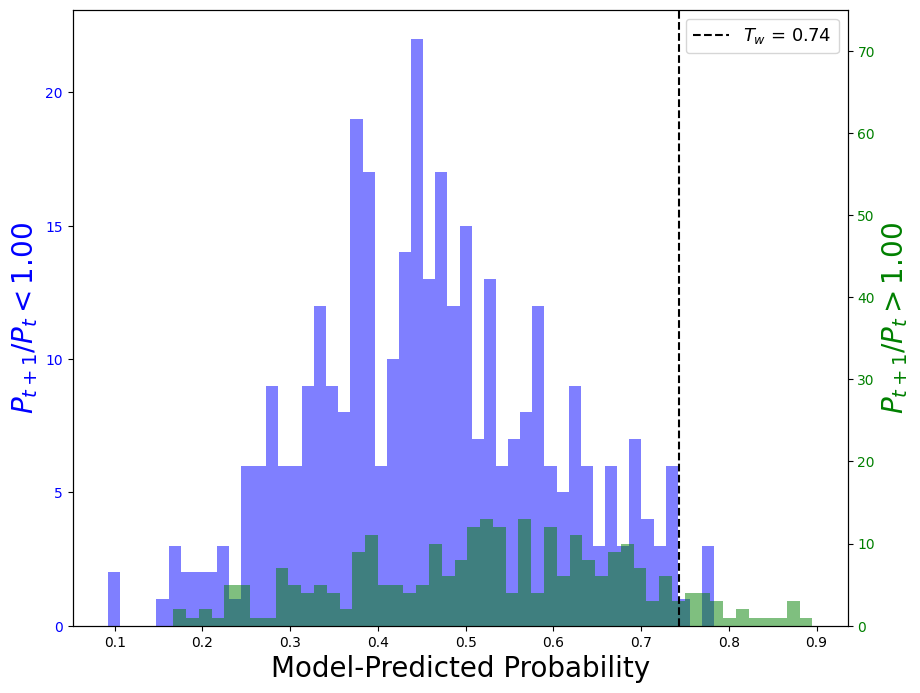

In [11]:
import matplotlib.pyplot as plt

# Histogram to see class predictions

true_threshold=1.0
bins = 50
y_pred=xgb_model.predict_proba(X_test)
True_Class=y_pred[y_test==1][:,1]
False_Class=y_pred[y_test==0][:,1]
thresh = 0.743

fig, ax1 = plt.subplots(figsize=(10,8))
ax1.hist(False_Class, bins, alpha=0.5, label='No', color='blue')
ax1.set_xlabel('Model-Predicted Probability', fontsize=20)
ax1.set_ylabel('$P_{t+1}/P_t<%.2f$'%true_threshold,  fontsize=20, color='blue')
for tl in ax1.get_yticklabels():
    tl.set_color('blue')
    
ax2 = ax1.twinx()
ax2.hist(True_Class, bins, alpha=0.5, color='green')
ax2.set_ylabel('$P_{t+1}/P_t>%.2f$'%true_threshold, fontsize=20, color='green')
for tl in ax2.get_yticklabels():
    tl.set_color('green')
ax2.set_ylim([0,75])
ax2.plot([thresh,thresh],[0,80],'k--', label=r'$T_w$ = %.2f'%thresh)
plt.legend(fontsize=13)

Tp = float(len(True_Class[True_Class >= thresh]))
Fp = len(False_Class[False_Class >= thresh])
Fn = len(True_Class[True_Class < thresh])
print("Precision=%f, Recall=%f, N_cases=%f"%(Tp/(Tp+Fp), Tp/(Tp+Fn), Tp))

plt.savefig('imgs/results.png')

In [23]:
# plot feature importances by fscore
feat_imp = pd.Series(xgb_model.booster().get_fscore()).sort_values(ascending=False)[0:20]
plt.figure(figsize=(10,10))
plt.bar(range(len(feat_imp)),feat_imp, tick_label=feat_imp.keys())
plt.xticks(fontsize=12,rotation=90);
plt.yticks(fontsize=12)
plt.gcf().subplots_adjust(bottom=0.35)
plt.ylabel('Split Frequency', fontsize = 15)
plt.savefig('imgs/feature_importances_20.png')

TypeError: 'NoneType' object is not callable

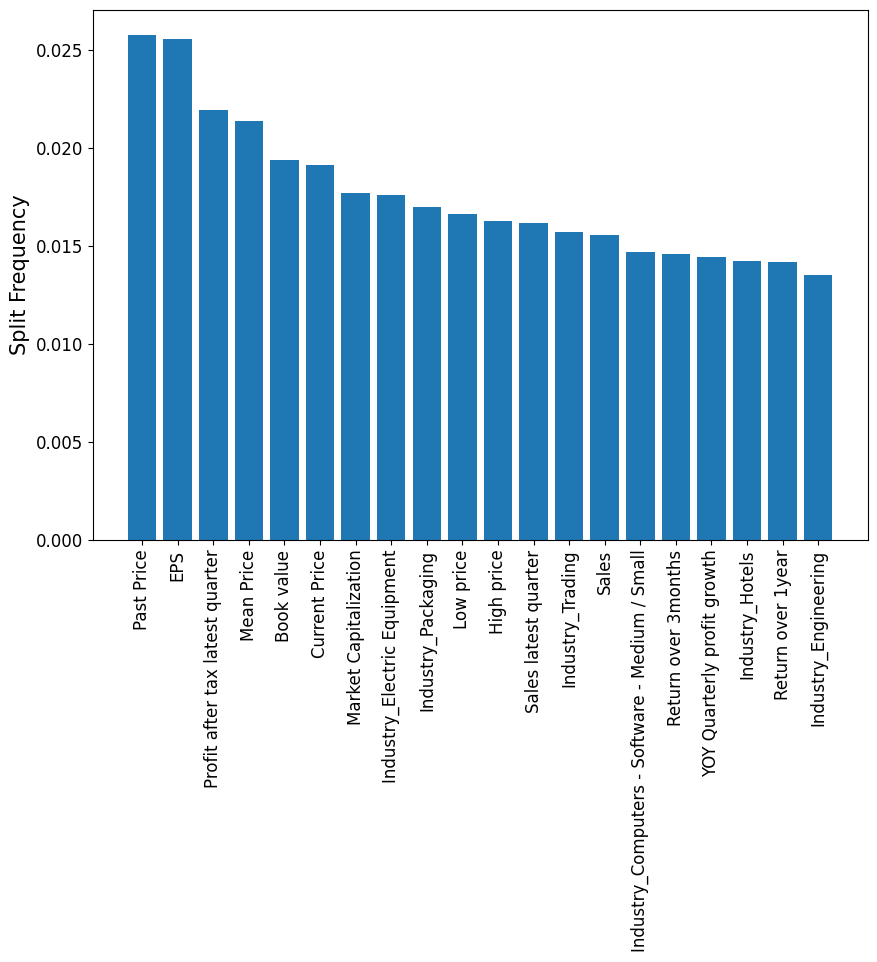

In [12]:
# Your code for feature importance calculation
feat_imp = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
feat_imp = feat_imp.sort_values(ascending=False)[:20]  

# Plotting
plt.figure(figsize=(10, 10))
plt.bar(range(len(feat_imp)), feat_imp, tick_label=feat_imp.keys())
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.gcf().subplots_adjust(bottom=0.35)
plt.ylabel('Split Frequency', fontsize=15)

# Saving the plot
plt.savefig('imgs/feature_importances_20.png')

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Check if xgb_model is not None and if it has a booster attribute
if xgb_model is not None and hasattr(xgb_model, 'booster'):
    # Your code for feature importance calculation
    feat_imp = pd.Series(xgb_model.booster().get_fscore()).sort_values(ascending=False)[0:20]

    # Plotting
    plt.figure(figsize=(10, 10))
    plt.bar(range(len(feat_imp)), feat_imp, tick_label=feat_imp.keys())
    plt.xticks(fontsize=12, rotation=90)
    plt.yticks(fontsize=12)
    plt.gcf().subplots_adjust(bottom=0.35)
    plt.ylabel('Split Frequency', fontsize=15)

    # Saving the plot
    plt.savefig('imgs/feature_importances_20.png')
else:
    print("xgb_model is either None or does not have a booster attribute.")


TypeError: 'NoneType' object is not callable

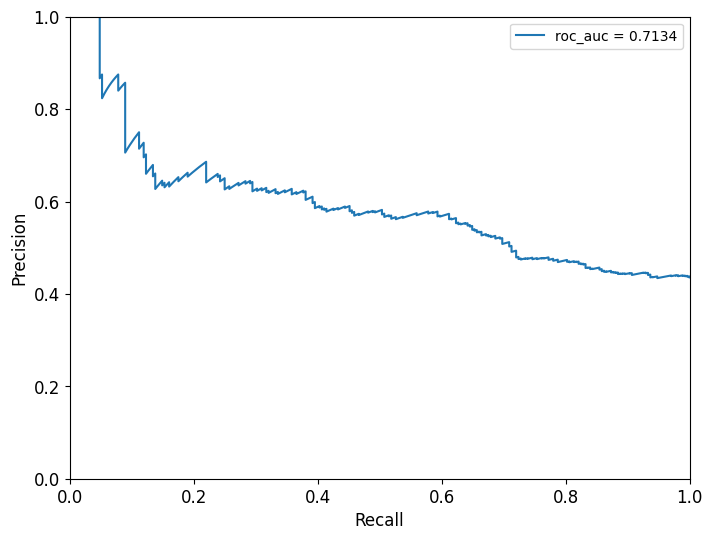

In [13]:
#PR curve
from sklearn.metrics import precision_recall_curve
y_pred = xgb_model.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred[:,1])

plt.figure(figsize=(8,6))
plt.plot(recall, precision, label='roc_auc = 0.7134')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Recall',fontsize=12)
plt.ylabel('Precision',fontsize=12)
plt.legend()
plt.savefig('imgs/precision_recall.png')
